Introduction
============

This is interactive notebook regarding "Introduction to path planning". (Author: Björn Hein)

License is based on Creative Commons: Attribution-NonCommercial 4.0 International (CC BY-NC 4.0) (pls. check: http://creativecommons.org/licenses/by-nc/4.0/)

This notebook imports all discussed algorithms and does a comparison

**Attention**: This worksheet has external dependencies 

* to the files "InnoKonz2dEnv.py" or "InnoKonzShapelyEnv.py". These files contain simple 2D environments based on numpy arrays or the shapely library with an interface for the use as collision checking in the algorithms.
* to all modules like "**Algorithm**.py", which contains the corresponding algorithms 

Important links are:

* General Info: http://www.python.org
* Python tutorial http://www.python.org/doc/tut/
* NetworkX http://networkx.github.io/
* NumPy and SciPy Guide http://docs.scipy.org/
* Matplotlib gallery http://matplotlib.sourceforge.net/gallery.html


Remember that:

* you have to press ctrl-return or shift-return, to execute the code in the code sections, only then the variables are "generated" and can be used
* you can execute the whole notebook by Cell->runAll

Änderungen BasicPRM

- Automated Planner Test:
  - IPBasicPRM_Roundtrip eingefügt
  - Eigene Methode für Planer erstellt
  - PlanRoundPath bei Visualisierung eingefügt
- IPBasicPRM_Roundtrip
  - erstellt aus IPBasicPRM
  - "Break" in "Continue" geändert bei "_learnRoadmapNearestNeighbour"
  - Funktion "PlanRoundPath" aus "PlanPath" erstellt
  - "InterimGoal" entsprechend "Start" und "Goal" eingefügt
  - InterimGoal in Lösungspfad eingebaut
- IPBenchmark
  - "InterimGoalList" eingefügt
- IPPlanerBase
  - "InterimGoalList" eingefügt
- IPTestSuite
  - Koordinate von InterimGoal hinzugefügt
- IPVISBasicPRM
  - Darstellung von Interim hinzugefügt

Adding all planners
===========


In [1]:
import sys
import HelperClass
sys.path.append("templates")
%load_ext autoreload
%autoreload 2

In [2]:
from IPPerfMonitor import IPPerfMonitor

import IPVISBasicPRM
import IPBasicPRM_Roundtrip

import IPVisibilityPRM_Roundtrip
import IPVISVisibilityPRM

import IPLazyPRM_Roundtrip
import IPVISLazyPRM


Set-up of the test scenario and the configuration for all planner
===================================

Following a procedure to compare all discussed planners are shown:

1. Configuration for every planner is defined
2. The configuration and the planner is stored in the variable setup, a Python dict()
3. the variable setup is then used to uniformly call the planning calls


In [3]:
plannerFactory = dict()

# basicConfig = dict()
# basicConfig["radius"] = 3
# basicConfig["numNodes"] = 200
# plannerFactory["basePRM"] = [IPBasicPRM_Roundtrip.BasicPRM, basicConfig, IPVISBasicPRM.basicPRMVisualize]

# visbilityConfig = dict()
# visbilityConfig["ntry"] = 300
# plannerFactory["visibilityPRM"] = [IPVisibilityPRM_Roundtrip.VisPRM, visbilityConfig, IPVISVisibilityPRM.visibilityPRMVisualize ]

lazyConfig = dict()
lazyConfig["initialRoadmapSize"] = 10
lazyConfig["updateRoadmapSize"]  = 5 
lazyConfig["kNearest"] = 8
plannerFactory["lazyPRM"] = [IPLazyPRM_Roundtrip.LazyPRM, lazyConfig, IPVISLazyPRM.lazyPRMVisualize]

In [4]:
class ResultCollection (object):
    
    def __init__(self, plannerFactoryName, planner, benchmark, solution, perfDataFrame):
        self.plannerFactoryName = plannerFactoryName
        self.planner = planner
        self.benchmark = benchmark
        self.solution = solution
        self.perfDataFrame = perfDataFrame

In [5]:
import IPTestSuite
import importlib

In [6]:
importlib.reload(IPTestSuite)

<module 'IPTestSuite' from '/home/maurice/Dokumente/Projekt_Roboterprogrammierung/_neu_GIT_03012024/RKIM23RobotProgramDS/02_eigeneNotebooks/IPTestSuite.py'>

In [7]:
fullBenchList = IPTestSuite.benchList

for benchmark in fullBenchList:
    print(benchmark.name)

Trap
Bottleneck
Fat bottleneck
B_rush
circle od death


In [8]:
resultList = list()
testList = fullBenchList[:1]

for key,producer in list(plannerFactory.items()):
    HelperClass.HelperClass.printInColor(str(key)+" "+ str(producer), 'yellow')
    #print(key, producer)
    for benchmark in testList:
        HelperClass.HelperClass.printInColor("Planning: " + key + " - " + benchmark.name, 'yellow')
        #planner = IPBasicPRM.BasicPRM(benchmark.collisionChecker)
        planner = producer[0](benchmark.collisionChecker)
        IPPerfMonitor.clearData()
        

        try:
            resultList.append(ResultCollection(key,
                                        planner, 
                                        benchmark, 
                                        planner.planRoundPath(benchmark.startList,benchmark.interimGoalList,benchmark.goalList,producer[1]),
                                        IPPerfMonitor.dataFrame()),)
            #a = planner.planPath(benchmark.startList,benchmark.goalList,producer[1])
            # print("")


        except Exception as e:
            HelperClass.HelperClass.printInColor("PLANNING ERROR ! PLANNING ERROR ! PLANNING ERROR", 'red')
            HelperClass.HelperClass.printInColor(e, 'red')
            pass
    
HelperClass.HelperClass.printInColor(resultList[0].solution, 'blue')

        

Result:[[3, 10], 7.810249675906654, 'interim0']
TRYPATH :['start', 1, 'interim0']
for-schleife beginnt
New Result ist result interim  interim0
Path ['start', 1]
*******
x start
y 1


Ziel-Interim[[3, 10], 7.810249675906654, 'interim0']
Abstand7.810249675906654
for-schleife beginnt
bin im Else
TRYPATH :[1, 'interim3']
for-schleife beginnt
New Result ist result interim  interim3
Path [1, 'interim3']
*******
x 1
y interim3
Element 1 [1]
Element 2 [1, 'interim3']
MaxTry: 1
TRYPATH :[1, 2, 'interim3']
for-schleife beginnt
New Result ist result interim  interim3
Path [1, 2]
*******
x 1
y 2


Ziel-Interim[[20, 15], 11.447862407957677, 'interim3']
Abstand11.447862407957677
for-schleife beginnt
New Result ist result interim  interim3
Path [1, 2]
*******
x 1
y 2


Ziel-Interim[[20, 15], 11.447862407957677, 'interim3']
Abstand7.997030406195566
for-schleife beginnt
New Result ist result interim  interim3
Path [1, 2]
*******
x 1
y 2


Ziel-Interim[[20, 15], 11.447862407957677, 'interim3']
Abstand0.0
Interim ist erreicht
Aktuelle Interim Goallist: [[3, 10], [22, 8], [3, 3], [20, 15], [10, 1]]
TRYPATH :['interim3', 0, 'interim1']
for-schleife beginnt
New Result ist result interim  interim1
Path ['interim3', 0]
Removed nodeNumber: 0
Element 1 ['interim3']
Element 2 ['interim3', 0]
MaxTry: 2
TRYPATH :['interim3', 4, 'interim1']
for-schleife beginnt
New Result ist result interim  interim1
Path ['interim3', 4]
*******
x interim3
y 4


Ziel-Interim[[22, 8], 7.280109889280518, 'interim1']
Abstand7.280109889280518
for-schleife beginnt
New Result ist result interim  interim1
Path ['interim3', 4]
*******
x interim3
y 4


Ziel-Interim[[22, 8], 7.280109889280518, 'interim1']
Abstand5.038373173193425
for-schleife beginnt
New Result ist result interim  interim1
Path ['interim3', 4]
*******
x interim3
y 4


Ziel-Interim[[22, 8], 7.280109889280518, 'interim1']
Abstand0.0
Interim ist erreicht
Aktuelle Interim Goallist: [[3, 10], [22, 8], [3, 3], [10, 1]]
TRYPATH :['interim1', 4, 7, 'interim4']
for-schleife beginnt
New Result ist result interim  interim4
Path ['interim1', 4]
*******
x interim1
y 4


Ziel-Interim[[10, 1], 13.892443989449804, 'interim4']
Abstand13.892443989449804
for-schleife beginnt
New Result ist result interim  interim4
Path ['interim1', 4]
*******
x interim1
y 4


Ziel-Interim[[10, 1], 13.892443989449804, 'interim4']
Abstand9.374309687982612
for-schleife beginnt
New Result ist result interim  interim4
Path ['interim1', 4]
*******
x interim1
y 4


Ziel-Interim[[10, 1], 13.892443989449804, 'interim4']
Abstand8.882938498204112
for-schleife beginnt
New Result ist result interim  interim4
Path ['interim1', 4]
*******
x interim1
y 4


Ziel-Interim[[10, 1], 13.892443989449804, 'interim4']
Abstand0.0
Interim ist erreicht
Aktuelle Interim Goallist: [[3, 10], [3, 3], [10, 1]]
TRYPATH :['interim4', 5, 'interim2']
for-schleife beginnt
New Result ist result interim  interim2
Path ['interim4', 5]
*******
x interim4
y 5


Ziel-Interim[[3, 3], 7.280109889280518, 'interim2']
Abstand7.280109889280518
for-schleife beginnt
New Result ist result interim  interim2
Path ['interim4', 5]
*******
x interim4
y 5


Ziel-Interim[[3, 3], 7.280109889280518, 'interim2']
Abstand2.328021410741112
for-schleife beginnt
New Result ist result interim  interim2
Path ['interim4', 5]
*******
x interim4
y 5


Ziel-Interim[[3, 3], 7.280109889280518, 'interim2']
Abstand0.0
Interim ist erreicht
Aktuelle Interim Goallist: [[3, 10], [3, 3]]
TRYPATH :['interim2', 5, 'interim0']
for-schleife beginnt
New Result ist result interim  interim0
Path ['interim2', 5]
*******
x interim2
y 5


Ziel-Interim[[3, 10], 7.0, 'interim0']
Abstand7.0
for-schleife beginnt
New Result ist result interim  interim0
Path ['interim2', 5]
*******
x interim2
y 5


Ziel-Interim[[3, 10], 7.0, 'interim0']
Abstand5.018147245119993
for-schleife beginnt
New Result ist result interim  interim0
Path ['interim2', 5]
*******
x interim2
y 5


Ziel-Interim[[3, 10], 7.0, 'interim0']
Abstand0.0
Interim ist erreicht
Aktuelle Interim Goallist: [[3, 10]]



Vorher: 26
Nachher: 26


No other connected components
Länge Gi: 1
Gi: Graph with 1 nodes and 0 edges
['start', 1, 2, 'interim3', 'interim3', 4, 'interim1', 'interim1', 4, 7, 'interim4', 'interim4', 5, 'interim2', 'interim2', 5, 'interim0']
Kanten: [(1, 'start'), (1, 'interim0'), (1, 2), (1, 7), (2, 'start'), (2, 'interim3'), (2, 7), (2, 4), (2, 5), (4, 'interim1'), (4, 'interim3'), (4, 7), (5, 'interim0'), (5, 'interim2'), (5, 'interim4'), (5, 7), (7, 'start'), (7, 'interim4')]
Solution: ['start', 1, 2, 'interim3', 'interim3', 4, 'interim1', 'interim1', 4, 7, 'interim4', 'interim4', 5, 'interim2', 'interim2', 5, 'interim0']

Planner: <IPLazyPRM_Roundtrip.LazyPRM object at 0x7f17c23f69d0>
Solution['start', 1, 2, 'interim3', 'interim3', 4, 'interim1', 'interim1', 4, 7, 'interim4', 'interim4', 5, 'interim2', 'interim2', 5, 'interim0']


/home/maurice/anaconda3/lib/python3.11/site-packages/descartes/patch.py:62: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  vertices = concatenate([


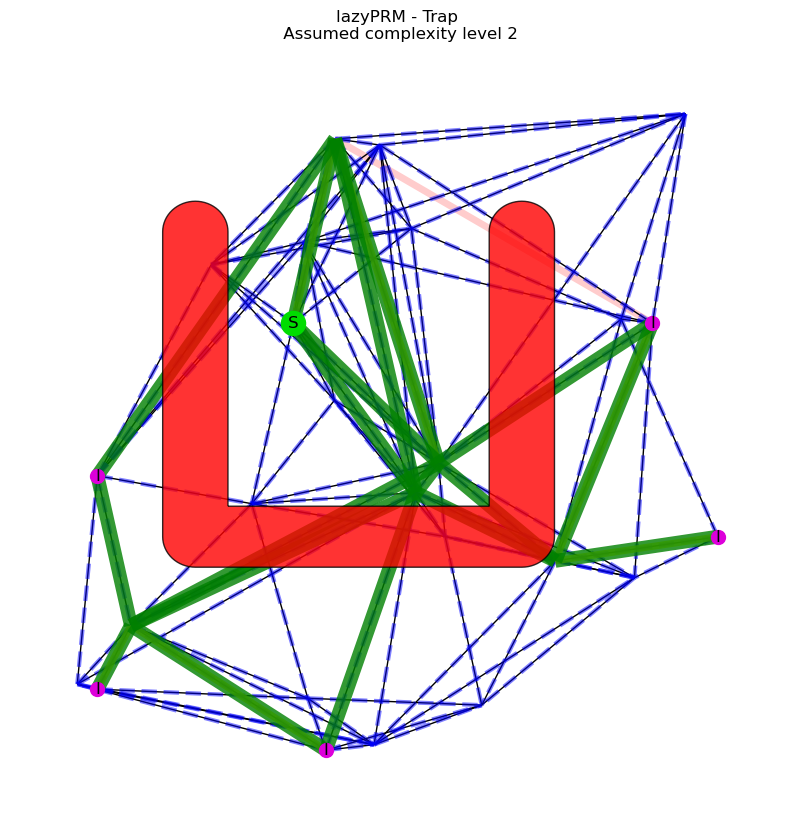

In [9]:
import matplotlib.pyplot as plt

for result in resultList:
    print(result)
    fig_local = plt.figure(figsize=(10,10))
    ax = fig_local.add_subplot(1,1,1)
    title = result.plannerFactoryName + " - " + result.benchmark.name
    if result.solution == []:
        title += " (No path found!)"
    title += "\n Assumed complexity level " + str(result.benchmark.level)
    ax.set_title(title)

    ax.grid(True)

    try:
        #IPVISBasicsPRM.basicPRMVisualize(result.planner, result.solution, ax=ax, nodeSize=100))
        plannerFactory[result.plannerFactoryName][2](result.planner, result.solution, ax=ax, nodeSize=100)
        print("")
        print("Planner: "+ str(result.planner))
        print("Solution" + str(result.solution))

    except Exception as e:
        print ("Error")
        print(e)
        pass
    

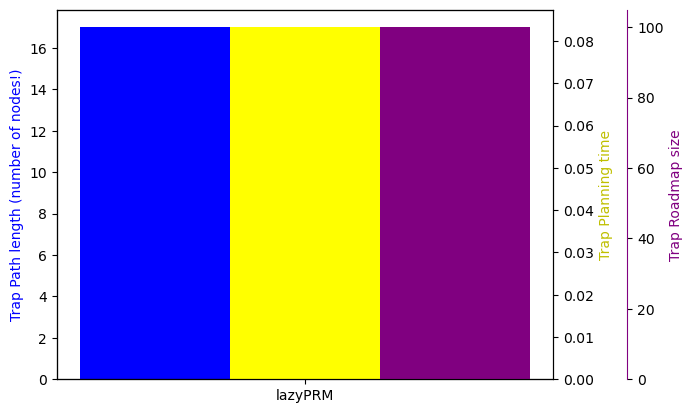

In [10]:
import numpy as np
for bench in testList:
    title = bench.name
    pathLength = dict()
    planningTime = dict()
    roadmapSize  = dict()
    
    try:
        for result in resultList:
            if result.benchmark.name == bench.name:
                #print result.benchmark.name  + " - " +  result.plannerFactoryName, len(result.solution)
                pathLength[result.plannerFactoryName] = len(result.solution)
                planningTime[result.plannerFactoryName] = result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)["time"]["planRoundPath"]
                roadmapSize[result.plannerFactoryName] = result.planner.graph.size()


        fig, ax = plt.subplots()

        width = 0.2

        ax.bar(np.arange(len(pathLength.keys())), pathLength.values(),width, color="blue")
        ax.set_ylabel(title + " Path length (number of nodes!)", color="blue")
        ax.set_xticks(np.arange(len(pathLength.keys())) + width)
        ax.set_xticklabels(pathLength.keys())

        ax2 = ax.twinx()
        bar = ax2.bar(np.arange(len(pathLength.keys()))+width, planningTime.values(),width, color="red")
        ax2.set_ylabel(title + " Planning time", color="y")

        # Add coloring and patterns on axis two
        hatches = ['x' if length==0 else '' for length in pathLength.values()]
        color   = ['red' if length==0 else 'yellow' for length in pathLength.values()]
        for i,thisbar in enumerate(bar.patches):
            thisbar.set_facecolor(color[i])
            thisbar.set_hatch(hatches[i])

        # Multiple axes 
        ax3 = ax.twinx()
        ax3.bar(np.arange(len(pathLength.keys()))+2*width, roadmapSize.values(),width, color="purple")
        ax3.set_ylabel(title + " Roadmap size",  color="purple")
        ax3.spines['right'].set_position(('axes', 1.15))
        ax3.spines['right'].set_color("purple")
    except:
        pass


    
        
    

result.perfDataFrame.groupby(["name"]).sum()

In [11]:
result.perfDataFrame.groupby(["name"]).sum(numeric_only=True)

,time
name,
_buildRoadmap,0.005063
_checkForCollisionAndUpdate,0.036391
_nearestInterim,0.005154
lineInCollision,0.029082
planRoundPath,0.083254
pointInCollision,0.027711


In [12]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"]

,name,args,kwargs,retVal,time
47,planRoundPath,(<IPLazyPRM_Roundtrip.LazyPRM object at 0x7f17...,{},"[start, 1, 2, interim3, interim3, 4, interim1,...",0.083254


In [13]:
result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)

/tmp/ipykernel_57324/2940436852.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  result.perfDataFrame[result.perfDataFrame["name"]=="planRoundPath"][result.perfDataFrame["retVal"]==False]["time"].sum(numeric_only=True)


0.0